### Script to
1. get count of pairs with label DW/DNW/H/R per dataset
2. get the %age of pairs which har H/R in one data while DNW in another in CCLE and GDSC
3. Check if Hump and rising curves are outliers (to be removed) or is it the property of some dr/cl BY PLOTTING A CONTINGENCY TABLE to see how many pairs are H/R in both datastes 
4. Finding corr b/w ic50 for  pairs with atleast 1 H/R



In [1]:
__author__ = 'Aanchal'

In [2]:
import pandas as pd
import numpy as np
import FUNCTIONS as f
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import FUNCTIONS as f

import warnings
warnings.filterwarnings('ignore')

In [3]:
Intersection_ic50=pd.read_csv('../data_processed/CurveCategoryDetection/Intersection_withCurveCategory_SplitNormalUsingIC50_newformat.csv')


In [4]:
Intersection_ic50

,cell line name,drug name,ccle_category,gdsc_category
0,KALS-1,Nutlin-3a,1.0,2.0
1,KALS-1,Tanespimycin,2.0,2.0
2,KALS-1,PLX-4720,1.0,2.0
3,KALS-1,PD0325901,2.0,2.0
4,KALS-1,Nilotinib,1.0,2.0
5,KALS-1,NVP-TAE684,2.0,2.0
6,KALS-1,Crizotinib,1.0,1.0
7,KALS-1,Saracatinib,1.0,2.0
8,KALS-1,PHA-665752,1.0,1.0
9,KALS-1,Paclitaxel,2.0,2.0


#### 1. get count of pairs with label DW/DNW/H/R per dataset

In [5]:
#3 categories new
Intersection_ic50['ccle_category'].value_counts()

1.0    2022
2.0    1629
4.0      60
3.0      24
Name: ccle_category, dtype: int64

In [6]:
#using IC50 new
Intersection_ic50['gdsc_category'].value_counts()

2.0    2596
1.0    1015
4.0      88
3.0      36
Name: gdsc_category, dtype: int64

#### 2. To get the %age of pairs which har H/R in one data while DNW in another in CCLE and GDSC

In [7]:
#ccle
noh=len( Intersection_ic50.loc [ (Intersection_ic50['ccle_category']==3) ] )
nor=len( Intersection_ic50.loc [ (Intersection_ic50['ccle_category']==4) ] )
hNdnw=len( Intersection_ic50.loc [ (Intersection_ic50['ccle_category']==3) & (Intersection_ic50['gdsc_category']==1)  ] )
rNdnw=len( Intersection_ic50.loc [ (Intersection_ic50['ccle_category']==4) & (Intersection_ic50['gdsc_category']==1)  ])
print("perc_hNdnw="+str(round(hNdnw/noh,2))) #old 82.35
print("perc_rNdnw="+str(round(rNdnw/nor,2))) #old 88.67


#gdsc
noh=len( Intersection_ic50.loc [ (Intersection_ic50['gdsc_category']==3) ] )
nor=len( Intersection_ic50.loc [ (Intersection_ic50['gdsc_category']==4) ] )
hNdnw=len( Intersection_ic50.loc [ (Intersection_ic50['gdsc_category']==3) & (Intersection_ic50['ccle_category']==1)  ] )
rNdnw=len( Intersection_ic50.loc [ (Intersection_ic50['gdsc_category']==4) & (Intersection_ic50['ccle_category']==1)  ])
print("perc_hNdnw="+str(round(hNdnw/noh,2))) #old 90.32
print("perc_rNdnw="+str(round(rNdnw/nor,2))) #old 81.81


perc_hNdnw=0.33
perc_rNdnw=0.53
perc_hNdnw=0.89
perc_rNdnw=0.78


#### 3. Check if Hump and rising curves are outliers (to be removed) or is it the property of some dr/cl BY PLOTTING A CONTINGENCY TABLE to see how many pairs are H/R in both datastes 

##### CONTINGENCY MATRIX- Along rows: CCLE, Along cols: GDSE (slightly diff from before bcz label 2 (DW) given only to pairs which have label 1 (DW o DNW) and not to either of 1/3/4)

Confusion matrix, without normalization
[[ 818 1103   32   69]
 [ 157 1453    4   15]
 [   8   13    0    3]
 [  32   27    0    1]]


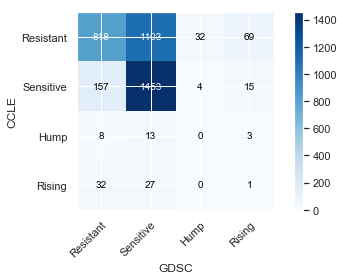

In [8]:
from sklearn.metrics import confusion_matrix

np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
f.plot_confusion_matrix(Intersection_ic50['ccle_category'],Intersection_ic50['gdsc_category'],classes=[1,2,3,4])


plt.savefig('../figures/CheckOutlierBeahviourAcrossDatasets/contingency_matrix.svg')
plt.savefig('../figures/CheckOutlierBeahviourAcrossDatasets/contingency_matrix.png')
plt.show()

In [11]:
a= Intersection_ic50[(Intersection_ic50['ccle_category']==3) & (Intersection_ic50['gdsc_category']==2)]
a

,cell line name,drug name,ccle_category,gdsc_category
309,769-P,PLX-4720,3.0,2.0
508,NCI-H1581,PLX-4720,3.0,2.0
534,NCI-H1693,Selumetinib,3.0,2.0
597,NCI-H1299,PLX-4720,3.0,2.0
961,SW780,PLX-4720,3.0,2.0
1049,G-402,PLX-4720,3.0,2.0
1372,NCI-H1869,Palbociclib,3.0,2.0
1412,HPAC,PLX-4720,3.0,2.0
2476,NCI-H1975,PLX-4720,3.0,2.0
2518,NCI-H1092,Nilotinib,3.0,2.0


In [9]:
table=pd.crosstab(Intersection_ic50['ccle_category'],Intersection_ic50['gdsc_category'])
table

gdsc_category,1.0,2.0,3.0,4.0
ccle_category,,,,
1.0,818,1103,32,69
2.0,157,1453,4,15
3.0,8,13,0,3
4.0,32,27,0,1


In [10]:
[chi2,p,dof,expected]=chi2_contingency(table)
p

1.353438033191414e-111

In [33]:
len(Intersection_ic50)

3735

#### 4. Finding corr b/w ic50 for  pairs with atleast 1 H/R

In [19]:
sample_col_name="cell line name"
drug_col_name="drug name"


In [34]:
shapeno=3 #hump 60/3735 pairs with atleast 1 hump (earlier 44/3004)
shapeno=4 #rising 147/3735 pairs with atelast 1 rising (earlier 114/3004)


df= Intersection_ic50[(Intersection_ic50['ccle_category']==shapeno) | (Intersection_ic50['gdsc_category']==shapeno)]
#df=df[(df['ccle_category']==1) | (df['gdsc_category']==1)]
df
table=pd.crosstab(df['ccle_category'],df['gdsc_category'])
(table)

gdsc_category,1.0,2.0,4.0
ccle_category,,,
1.0,0,0,69
2.0,0,0,15
3.0,0,0,3
4.0,32,27,1


In [35]:
[chi2,p,dof,expected]=chi2_contingency(table)
p

2.439097276991727e-28

In [36]:
len(df)

147

In [37]:
df=df.rename(columns={'Cell_line_name':'Standard cell line name','Drug _Name':'Standard drug name'})  
[dic_cl_ccle,dic_dr_ccle]=f.getDictionary('CCLE',1)
df=df.replace(dic_cl_ccle)
df=df.replace(dic_dr_ccle)
df
df['_label']=0*len(df)

In [38]:
'''if (shapeno==3):
    f.copyPastePlots('../figures/FittedCurves_commonPairs_plots_without5dosageDrugs/', '../figures/CheckOutlierBeahviourAcrossDatasets/FittedCurves_commonPairs_atleast1hump_plots/', '', '','', 0, df)
elif(shapeno==4):    
    f.copyPastePlots('../figures/FittedCurves_commonPairs_plots_without5dosageDrugs/', '../figures/CheckOutlierBeahviourAcrossDatasets/FittedCurves_commonPairs_atleast1rising_plots/', '', '','', 0, df)'''

"if (shapeno==3):\n    f.copyPastePlots('../figures/FittedCurves_commonPairs_plots_without5dosageDrugs/', '../figures/CheckOutlierBeahviourAcrossDatasets/FittedCurves_commonPairs_atleast1hump_plots/', '', '','', 0, df)\nelif(shapeno==4):    \n    f.copyPastePlots('../figures/FittedCurves_commonPairs_plots_without5dosageDrugs/', '../figures/CheckOutlierBeahviourAcrossDatasets/FittedCurves_commonPairs_atleast1rising_plots/', '', '','', 0, df)"

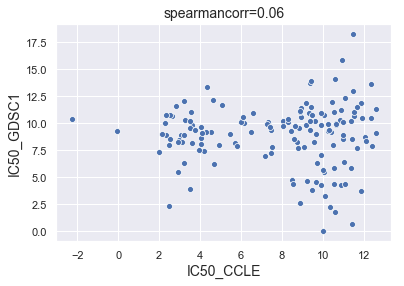

In [39]:
df=f.get_ic50s_asFeatures(df, sample_col_name, drug_col_name)

f.plotVectorsGetCorr_seaborn('IC50_CCLE','IC50_GDSC1',df,'spearman' ,[],14)

if (shapeno==3):
    plt.savefig('../figures/CheckOutlierBeahviourAcrossDatasets/atleast1hump_ic50gdsc_vs_ic50ccle.svg')
    plt.savefig('../figures/CheckOutlierBeahviourAcrossDatasets/atleast1hump_ic50gdsc_vs_ic50ccle.png')
elif(shapeno==4):
    plt.savefig('../figures/CheckOutlierBeahviourAcrossDatasets/atleast1rising_ic50gdsc_vs_ic50ccle.svg')
    plt.savefig('../figures/CheckOutlierBeahviourAcrossDatasets/atleast1rising_ic50gdsc_vs_ic50ccle.png')
plt.show()

<Figure size 432x288 with 0 Axes>

In [32]:
len(df)

147

#### To count the common pairs showing similar behaviour (hump or rising) in both datasets

In [27]:
table=pd.crosstab(Intersection_ic50['ccle_category'].replace({3:0,4:0, 2:1}),Intersection_ic50['gdsc_category'].replace({3:0,4:0,  2:1}))
table

gdsc_category,0.0,1.0
ccle_category,,
0.0,4,80
1.0,120,3531


In [28]:
[chi2,p,dof,expected]=chi2_contingency(table)
p

0.6613052215497751

###### **uses input generated from scripts which use dose response files in new format 